# Data Exploration

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")

load dataset

In [2]:
battles = pd.read_csv('dataset/battles.csv')

## Preview Dataset
melakukan preview dataset untuk melihat sekilas gambaran kolom dan baris data yang ada

In [3]:
pd.set_option('display.max_columns', None)
battles

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
5,Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN,win,ambush,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
6,Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
7,Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,pitched battle,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
8,Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,siege,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN
9,Battle of the Stony Shore,299,10,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,NaN,NaN,win,ambush,0.0,0.0,264.0,NaN,Theon Greyjoy,NaN,1.0,Stony Shore,The North,Greyjoy's troop number based on the Battle of ...


## Informasi Dataset

terdiri dari **38 baris** dan **25 kolom** \
dengan tipe data _object_(16), _int64_(2), dan _float64_(7) \
beberapa kolom memiliki nilai Null



In [4]:
battles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                38 non-null     object 
 1   year                38 non-null     int64  
 2   battle_number       38 non-null     int64  
 3   attacker_king       36 non-null     object 
 4   defender_king       35 non-null     object 
 5   attacker_1          38 non-null     object 
 6   attacker_2          10 non-null     object 
 7   attacker_3          3 non-null      object 
 8   attacker_4          2 non-null      object 
 9   defender_1          37 non-null     object 
 10  defender_2          2 non-null      object 
 11  defender_3          0 non-null      float64
 12  defender_4          0 non-null      float64
 13  attacker_outcome    37 non-null     object 
 14  battle_type         37 non-null     object 
 15  major_death         37 non-null     float64
 16  major_capt

## Persentase Missing Values
menghitung jumlah serta persentase nilai null yang terdapat pada setiap kolom

In [5]:
missing_values_total = battles.isnull().sum().sort_values(ascending=False)
missing_values_pct = (battles.isnull().mean()*100).sort_values(ascending=False)

missing_values = pd.concat([missing_values_total, missing_values_pct, battles.dtypes],
                           keys=['Total','Percentage','Dtype'],
                           axis=1)
missing_values.head(15)

,Total,Percentage,Dtype
defender_4,38,100.000000,float64
defender_3,38,100.000000,float64
defender_2,36,94.736842,object
attacker_4,36,94.736842,object
attacker_3,35,92.105263,object
note,33,86.842105,object
attacker_2,28,73.684211,object
defender_size,19,50.000000,float64
attacker_size,14,36.842105,float64
defender_commander,10,26.315789,object


## Pemeriksaan Dataset

setelah melakukan eksplorasi awal berupa preview data dan menghitung jumlah persentase nilai null serta membaca dari berbagai sumber yang ada di website kaggle dan wiki, ditemukan beberapa baris data yang dapat diperbaiki maupun ditambahkan untuk melengkapi dataset

### Temuan 1
pada baris 37 terdapat _battle_type_ dengan nilai NaN yang bisa diisi sesuai dengan battle _name_ yaitu **siege**

In [6]:
battles[['name','battle_type']].loc[battles['battle_type'].isnull()]

,name,battle_type
37,Siege of Winterfell,NaN


### Temuan 2
pada baris 37 terdapat *attacker_outcome* dengan nilai NaN. 

dikutip dari [wiki March on Winterfell](https://awoiaf.westeros.org/index.php/March_on_Winterfell) (*link Siege_of_Winterfell di-alihkan ke March_on_Winterfell*),\
pada Aftermath, Roose Bolton memulangkan pasukan dan Stannis Baratheon tetap tinggal disana bersama tuan rumah untuk selanjutnya bersiap perang melawan Bolton.

dari kutipan Aftermath diatas,bisa disimpulkan *attacker_outcome* dapat di-isi dengan *win* 

In [7]:
battles[['name','attacker_outcome']].loc[battles['attacker_outcome'].isnull()]

,name,attacker_outcome
37,Siege of Winterfell,NaN


### Temuan 3
dikutip dari [notebook dianyuurl](https://www.kaggle.com/dianyuurl/game-of-thrones-battles-analysis), pada [wiki Game of Thrones](https://gameofthrones.fandom.com/wiki/Battle_of_Castle_Black) _attacker_king_ seharusnya Mance Rayder dan _defender_king_ seharusnya Stannis Baratheon

In [8]:
battles[['attacker_king','defender_king','attacker_size','defender_size']].loc[27]

attacker_king    Stannis Baratheon
defender_king         Mance Rayder
attacker_size             100000.0
defender_size               1240.0
Name: 27, dtype: object

### Temuan 4
pada variabel *attacker_1* s/d *attacker_4* dan *defender_1* s/d defender_4** memiliki banyak nilai **NaN**, maka dari itu:
- bisa diekstraksi menjadi fitur baru berupa jumlah attacker house dan defender house
- setelah itu variabel dengan jumlah NaN >60% bisa di-drop

In [9]:
battles[['attacker_1','attacker_2','attacker_3','attacker_4','defender_1','defender_2','defender_3','defender_4']].head()

,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,defender_3,defender_4
0,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
1,Lannister,NaN,NaN,NaN,Baratheon,NaN,NaN,NaN
2,Lannister,NaN,NaN,NaN,Tully,NaN,NaN,NaN
3,Stark,NaN,NaN,NaN,Lannister,NaN,NaN,NaN
4,Stark,Tully,NaN,NaN,Lannister,NaN,NaN,NaN


### Temuan 5
pada *attacker_commander* dan *defender_commander* berisi nama commander yang dipisahkan oleh koma :
- bisa diekstraksi menjadi fitur baru berupa jumlah commander 
- setelah itu bisa dihapus pada saat training model

In [10]:
battles[['attacker_commander','defender_commander']].head()

,attacker_commander,defender_commander
0,Jaime Lannister,"Clement Piper, Vance"
1,Gregor Clegane,Beric Dondarrion
2,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood"
3,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist..."
4,"Robb Stark, Brynden Tully",Jaime Lannister


### Temuan 6
Imbalanced Data, diperlukan teknik - teknik khusus pada saat membangun model, seperti :
- Menggunakan metrik evaluasi yang sesuai
- Melakukan resampling data
- Menggunakan cross-validation

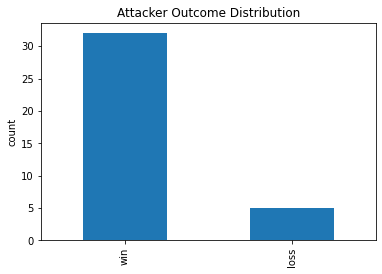

win     32
loss     5
Name: attacker_outcome, dtype: int64

In [11]:
battles['attacker_outcome'].value_counts().plot(kind='bar')
plt.title("Attacker Outcome Distribution") 
plt.ylabel("count") 
plt.show()

battles['attacker_outcome'].value_counts()

# Data Cleaning

pada tahapan ini dilakukan pembersihan data yang telah didapatkan pada tahapan eksplorasi seperti memperbaiki baris data yang kurang tepat, mengisi baris data yang hilang, melakukan ekstraksi fitur/kolom baru serta melakukan penghapusan kolom yang memiliki nilai null diatas 60%

In [12]:
df = battles.copy()

## *battle_type*  dan *attacker_outcome* pada baris ke-37

melakukan input missing value pada kolom *battle_type* sesuai dengan battle *name* pada baris ke-37

In [13]:
df.loc[37,['name','battle_type','attacker_outcome']]

name                Siege of Winterfell
battle_type                         NaN
attacker_outcome                    NaN
Name: 37, dtype: object

In [14]:
df.loc[37, 'battle_type'] = 'siege'

In [15]:
df.loc[37, 'attacker_outcome'] = 'win'

In [16]:
df.loc[37,['name','battle_type','attacker_outcome']]

name                Siege of Winterfell
battle_type                       siege
attacker_outcome                    win
Name: 37, dtype: object

## *attacker_king* dan *defender_king* baris ke-27
melakukan penukaran nama *attacker_king* dan *defender_king* karena terjadi kesalahan pada dataset, hasil temuan dari eksplorasi dataset

In [17]:
df[['attacker_king','defender_king']].loc[27]

attacker_king    Stannis Baratheon
defender_king         Mance Rayder
Name: 27, dtype: object

In [18]:
df.loc[27, 'attacker_king'] = 'Mance Rayder'
df.loc[27, 'defender_king'] = 'Stannis Baratheon'

In [19]:
df[['attacker_king','defender_king']].loc[27]

attacker_king         Mance Rayder
defender_king    Stannis Baratheon
Name: 27, dtype: object

## Feature Extraction

### *attacker_count* dan *defender_count*
pada kolom *attacker_1* s/d *attacker_4* dan *defender_1* s/d *defender_4* terdapat banyak sekali nilai null (60%-100%), \
maka dari itu bisa dilakukan ekstraksi dengan cara menghitung jumlah attacker house dan defender house

In [20]:
df['attacker_count'] = np.nan
df['defender_count'] = np.nan

In [21]:
df[['attacker_count','defender_count']].head()

,attacker_count,defender_count
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [22]:
atk_count = []
def_count = []
for idx,row in df.iterrows():
    atk_c = row[['attacker_1','attacker_2','attacker_3','attacker_4']].notnull().sum()
    def_c = row[['defender_1','defender_2','defender_3','defender_4']].notnull().sum()
    atk_count.append(atk_c)
    def_count.append(def_c)
df['attacker_count'] = atk_count
df['defender_count'] = def_count

In [23]:
df[['attacker_count','defender_count']].head()

,attacker_count,defender_count
0,1,1
1,1,1
2,1,1
3,1,1
4,2,1


### attacker_commander_count dan defender_commander_count
menghitung jumlah attacker commander dan defender commander dengan melakukan ekstraksi nama - nama commander yang tersedia pada kolom *attacker_commander* dan *defender_commander*

terdapat kolom dengan nilai null pada nama commander,sehingga disini bisa diisi dengan nilai 1 dengan anggapan raja yang menjadi commander dalam peperangan

In [24]:
df['attacker_commander_count'] = np.nan
df['defender_commander_count'] = np.nan

In [25]:
df[['attacker_commander_count','defender_commander_count']].head()

,attacker_commander_count,defender_commander_count
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [26]:
df['attacker_commander_count'] = df['attacker_commander'].str.split(',').str.len()
df['defender_commander_count'] = df['defender_commander'].str.split(',').str.len()

# mengubah nilai NaN menjadi 1, dengan anggapan raja menjadi commander 
df['attacker_commander_count'].fillna(value=1,inplace=True)
df['defender_commander_count'].fillna(value=1,inplace=True)

df['attacker_commander_count'] = df['attacker_commander_count'].astype('int64')
df['defender_commander_count'] = df['defender_commander_count'].astype('int64')

In [27]:
df[['attacker_commander_count','defender_commander_count']].tail()

,attacker_commander_count,defender_commander_count
33,2,1
34,2,1
35,3,1
36,2,1
37,1,1


## Drop Column with Null Values
pada saat melakukan eksplorasi terdapat kolom dengan persentase nilai null diatas 60% bahkan 100% khususnya pada kolom nama defender house dan attacker house. \
karena sudah dilakukan ekstraksi pada kolom - kolom yang diperlukan, maka kolom dengan nilai null diatas 60% akan dihapus

In [28]:
missing_values.head(10)

,Total,Percentage,Dtype
defender_4,38,100.000000,float64
defender_3,38,100.000000,float64
defender_2,36,94.736842,object
attacker_4,36,94.736842,object
attacker_3,35,92.105263,object
note,33,86.842105,object
attacker_2,28,73.684211,object
defender_size,19,50.000000,float64
attacker_size,14,36.842105,float64
defender_commander,10,26.315789,object


In [29]:
df = df.loc[:, df.isnull().mean() <= .6]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      38 non-null     object 
 1   year                      38 non-null     int64  
 2   battle_number             38 non-null     int64  
 3   attacker_king             36 non-null     object 
 4   defender_king             35 non-null     object 
 5   attacker_1                38 non-null     object 
 6   defender_1                37 non-null     object 
 7   attacker_outcome          38 non-null     object 
 8   battle_type               38 non-null     object 
 9   major_death               37 non-null     float64
 10  major_capture             37 non-null     float64
 11  attacker_size             24 non-null     float64
 12  defender_size             19 non-null     float64
 13  attacker_commander        37 non-null     object 
 14  defender_com

## Save Dataset
menyimpan dataset yang sudah dibersihkan

In [31]:
df.to_csv('dataset/battles_cleaned.csv',index=False)

# Data Visualization

Visualisasi data dilakukan untuk menampilkan informasi - informasi yang terdapat dalam dataset agar mendapatkan pemahaman yang lebih jelas.

Dilakukan setelah data dibersihkan untuk menampilkan informasi menarik dari data yang telah diolah.

In [32]:
df = pd.read_csv('dataset/battles_cleaned.csv')

## Most Aggresive King

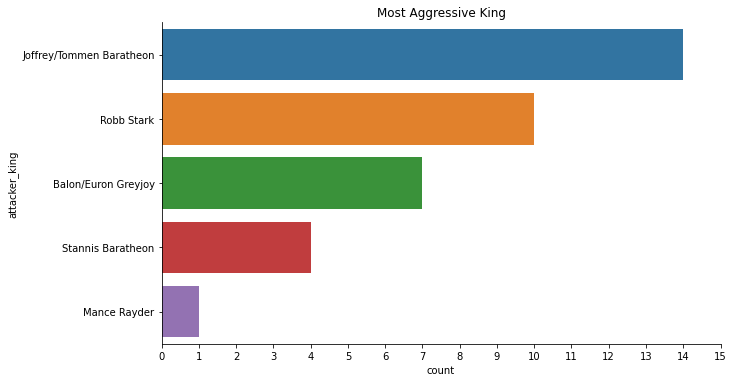

In [33]:
atk_king = sns.catplot(y='attacker_king',
                       data=df,
                       kind='count',
                       height=5,
                       aspect=2)
atk_king.ax.set_xticks(range(0,16))
plt.title("Most Aggressive King") 
plt.show()

## Most Defensive King

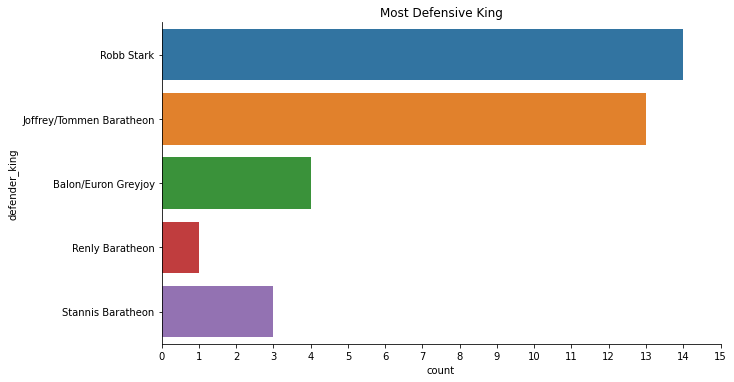

In [34]:
def_king = sns.catplot(y='defender_king',
                       data=df,
                       kind='count',
                       height=5,
                       aspect=2)
def_king.ax.set_xticks(range(0,16))
plt.title("Most Defensive King") 
plt.show()

## Attacker Army Size

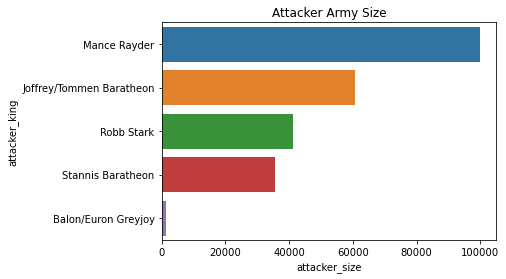

In [35]:
attacker_army = df['attacker_size'].groupby(df['attacker_king']).sum().reset_index().sort_values(by='attacker_size',ascending=False)
atk_size_plot = sns.barplot(y='attacker_king',
                      x='attacker_size',
                      data=attacker_army)
plt.title("Attacker Army Size") 
plt.show()

## Defender Army Size

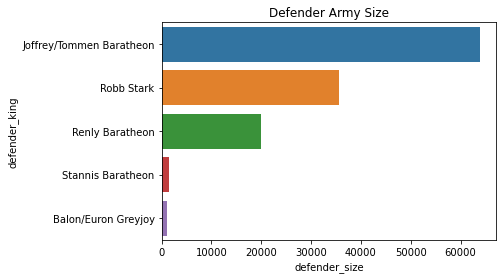

In [36]:
defender_army = df['defender_size'].groupby(df['defender_king']).sum().reset_index().sort_values(by='defender_size',ascending=False)
def_size_plot = sns.barplot(y='defender_king',
                      x='defender_size',
                      data=defender_army)
plt.title("Defender Army Size") 
plt.show()

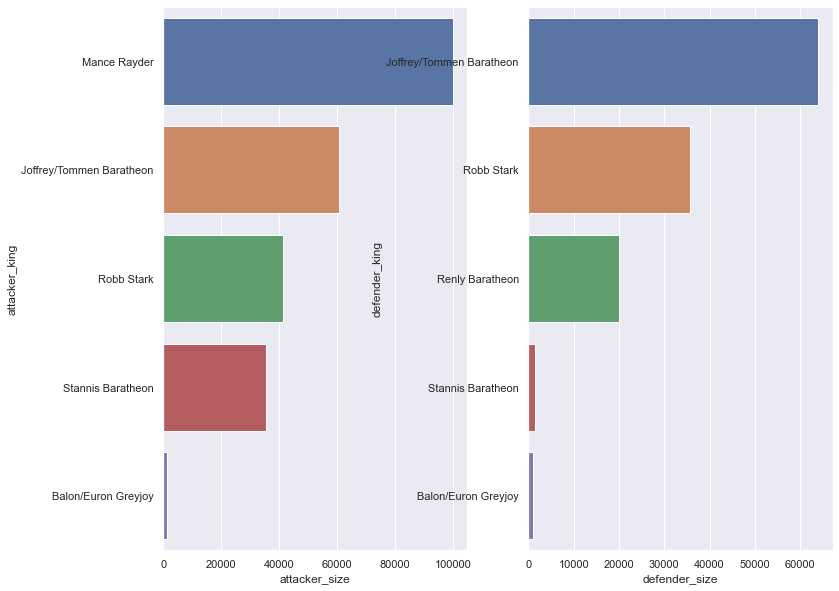

In [37]:
attacker_army = df['attacker_size'].groupby(df['attacker_king']).sum().reset_index().sort_values(by='attacker_size',ascending=False)
defender_army = df['defender_size'].groupby(df['defender_king']).sum().reset_index().sort_values(by='defender_size',ascending=False)

sns.set(rc={'figure.figsize':(12,10)})
fig, ax =plt.subplots(1,2)

atk_size_plot = sns.barplot(y='attacker_king',
                      x='attacker_size',
                      data=attacker_army, ax=ax[0])
def_size_plot = sns.barplot(y='defender_king',
                      x='defender_size',
                      data=defender_army, ax=ax[1])
fig.show()

## Total of Attacker Commander

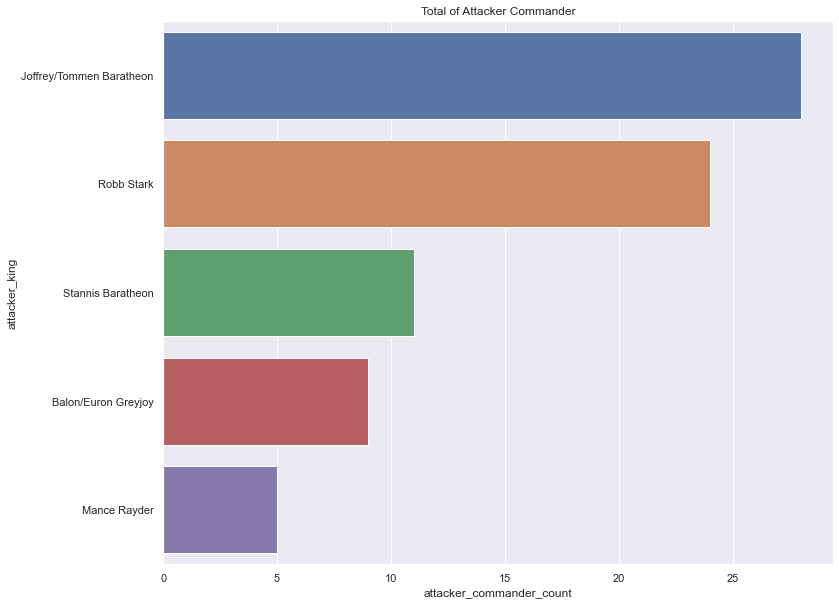

In [38]:
data = df['attacker_commander_count'].groupby(df['attacker_king']).sum().reset_index().sort_values(by='attacker_commander_count',ascending=False)
atk_cmd = sns.barplot(y='attacker_king',
                      x='attacker_commander_count',
                      data=data)
plt.title("Total of Attacker Commander") 
plt.show()

## Battle Outcome

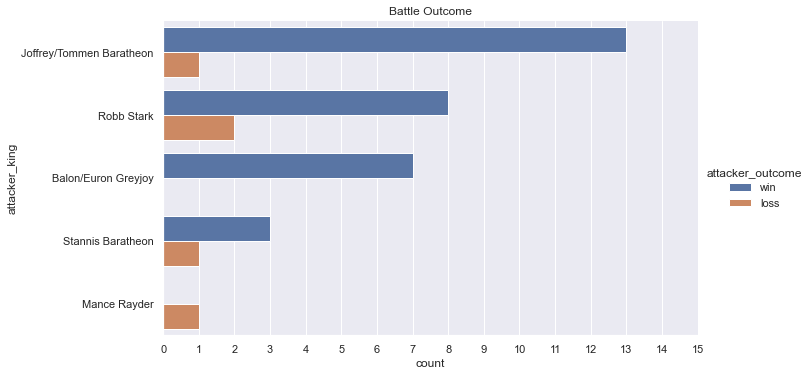

In [39]:
battle_outcome = sns.catplot(y='attacker_king',
                             hue='attacker_outcome',
                             kind='count',
                             data=df,
                             height=5,
                             aspect=2)
battle_outcome.ax.set_xticks(range(0,16))
plt.title("Battle Outcome") 
plt.show()

## The Type of War that Each King Won The Most

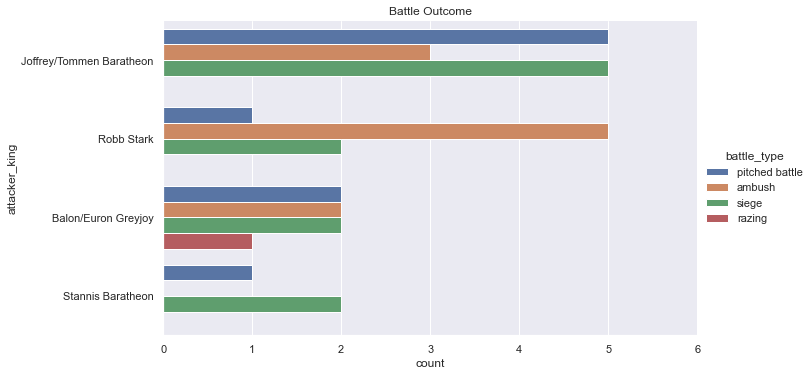

In [40]:
win = df[df['attacker_outcome']=='win']
xs = sns.catplot(y='attacker_king', 
            hue='battle_type', 
            kind='count',
            data=win,
            height=5,
            aspect=2)
xs.ax.set_xticks(range(0,7))
plt.title("Battle Outcome") 
plt.show()

## Correlation of Army Size

<AxesSubplot:xlabel='defender_size', ylabel='attacker_size'>

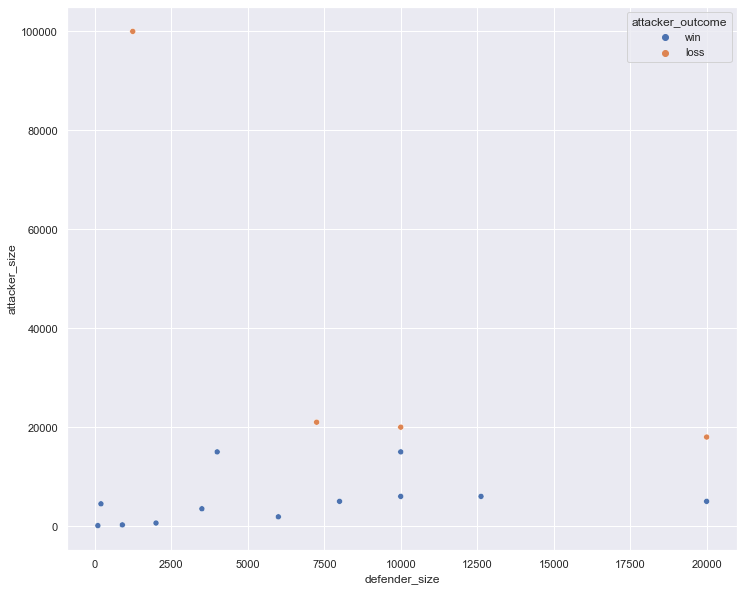

In [41]:
sns.scatterplot(data=df, x="defender_size", y="attacker_size",hue="attacker_outcome")

In [42]:
atk = df[['attacker_king',
    'attacker_size']
  ].groupby(df['attacker_king']).sum()


deff = df[['defender_king',
    'defender_size']
  ].groupby(df['defender_king']).sum()

df2 = pd.merge(atk.reset_index(),deff.reset_index(),left_on='attacker_king',right_on='defender_king',how='outer')
df2.loc[5,'attacker_king'] = 'Renly Baratheon'
df2.drop(columns=['defender_king'],inplace=True)
df2 = df2.replace(np.nan,0)
df2

,attacker_king,attacker_size,defender_size
0,Balon/Euron Greyjoy,1284.0,1100.0
1,Joffrey/Tommen Baratheon,60618.0,63975.0
2,Mance Rayder,100000.0,0.0
3,Robb Stark,41219.0,35620.0
4,Stannis Baratheon,35500.0,1440.0
5,Renly Baratheon,0.0,20000.0


# Data Pre-processing

In [43]:
df = pd.read_csv('dataset/battles_cleaned.csv')

## Drop Unused Column


`battle_number` hanya nomor baris \
`name` hanya nama pertempuran dan kurang informatif untuk model \
`year` berisi tahun peperangan yang kurang informatif untuk model \
`attacker_commander` dan `defender_commander` kurang informatif karena berisi nama komander dipisah dengan spasi

In [44]:
df.drop(columns=['battle_number','name','year','attacker_commander','defender_commander'],inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   attacker_king             36 non-null     object 
 1   defender_king             35 non-null     object 
 2   attacker_1                38 non-null     object 
 3   defender_1                37 non-null     object 
 4   attacker_outcome          38 non-null     object 
 5   battle_type               38 non-null     object 
 6   major_death               37 non-null     float64
 7   major_capture             37 non-null     float64
 8   attacker_size             24 non-null     float64
 9   defender_size             19 non-null     float64
 10  summer                    37 non-null     float64
 11  location                  37 non-null     object 
 12  region                    38 non-null     object 
 13  attacker_count            38 non-null     int64  
 14  defender_cou

## Data Encoding
\
menggunakan LabelEncoder untuk encode karena tidak berpengaruh pada nilai NaN sedangkan OrdinalEncoder tidak bisa menghandle nilai NaN
diperlukan Encoding untuk dataset (khususnya data kategori) sebelum dilakukan Imputasi

In [46]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
np.random.seed(1772023)
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: le.fit_transform(x.astype(str)))

In [47]:
df.head()

,attacker_king,defender_king,attacker_1,defender_1,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,summer,location,region,attacker_count,defender_count,attacker_commander_count,defender_commander_count
0,1,3,9,10,1,1,1.0,0.0,15000.0,4000.0,1.0,6,6,1,1,1,2
1,1,3,9,0,1,0,1.0,0.0,NaN,120.0,1.0,11,4,1,1,1,1
2,1,3,9,10,1,1,0.0,1.0,15000.0,10000.0,1.0,15,4,1,1,2,2
3,3,1,10,6,0,1,1.0,1.0,18000.0,20000.0,1.0,7,4,1,1,5,4
4,3,1,10,6,1,0,1.0,1.0,1875.0,6000.0,1.0,25,4,2,1,2,1


## Set Train Features and Target

In [48]:
y = df['attacker_outcome']
X = df.drop(columns='attacker_outcome')


## Data Imputation

### Finding The Right Method for Imputation

menggunakan metode `iterativeImputer` dan `SimpleImputer` untuk mencari metode yang cocok (nilai error terkecil pada saat prediksi) untuk melakukan pengisian nilai null

referensi: [imputing missing values with variants of iterativeimputer - scikit-learn](https://scikit-learn.org/stable/auto_examples/impute/plot_iterative_imputer_variants_comparison.html#imputing-missing-values-with-variants-of-iterativeimputer)

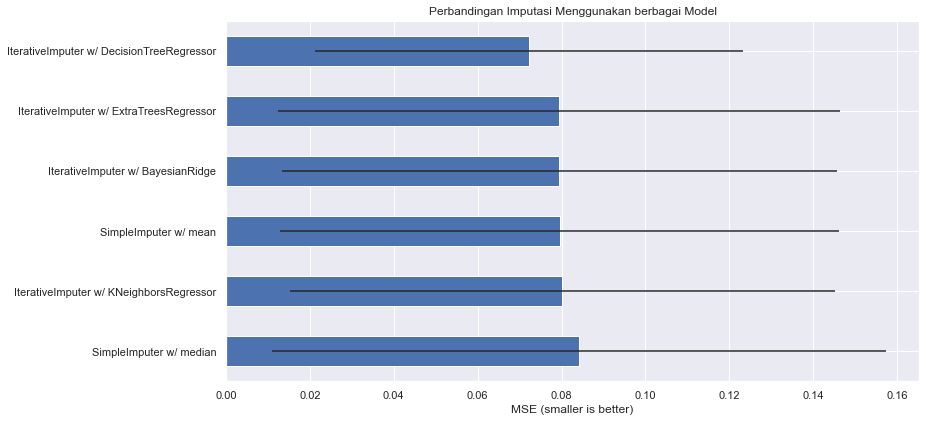

In [49]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import SimpleImputer, IterativeImputer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


df_y = df['attacker_outcome']
df_X = df.drop(columns='attacker_outcome')

N_SPLITS = 5
br_estimator = BayesianRidge()

np.random.seed(1772023)

# Estimate the score after imputation (mean and median strategies)
score_simple_imputer = pd.DataFrame()
for strategy in ('mean', 'median'):
    estimator = make_pipeline(
        StandardScaler(),
        SimpleImputer(missing_values=np.nan, strategy=strategy),
        br_estimator
    )
    score_simple_imputer[strategy] = cross_val_score(
        estimator, df_X, df_y, scoring='neg_mean_squared_error',
        cv=N_SPLITS
    )
    
# Estimate the score after iterative imputation of the missing values
# with different estimators
estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=6)
]

score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        StandardScaler(),
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, df_X, df_y, scoring='neg_mean_squared_error',
            cv=N_SPLITS
    )

scores = pd.concat(
    [score_simple_imputer, score_iterative_imputer],
    keys=['SimpleImputer', 'IterativeImputer'], axis=1
)

# plot results
fig, ax = plt.subplots(figsize=(13, 6))
means = -scores.mean().sort_values()
errors = scores.std().sort_values()
means.plot.barh(xerr=errors, ax=ax)
ax.set_title('Perbandingan Imputasi Menggunakan berbagai Model')
ax.set_xlabel('MSE (smaller is better)')
ax.set_yticks(np.arange(means.shape[0]))
ax.set_yticklabels([" w/ ".join(label) for label in means.index.tolist()])
plt.tight_layout(pad=1)
plt.show()

In [50]:
-scores.mean().sort_values(ascending=False)

IterativeImputer  DecisionTreeRegressor    0.072222
                  ExtraTreesRegressor      0.079369
                  BayesianRidge            0.079461
SimpleImputer     mean                     0.079595
IterativeImputer  KNeighborsRegressor      0.080226
SimpleImputer     median                   0.084144
dtype: float64

### Imputation

In [51]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

impute_estimator = DecisionTreeRegressor(max_features='sqrt')
imputer = IterativeImputer(estimator=impute_estimator)

np.random.seed(1772023)
X_imp = imputer.fit_transform(X)

In [52]:
X_imp[-1:]

array([[4.0e+00, 1.0e+00, 0.0e+00, 2.0e+00, 3.0e+00, 1.0e+00, 0.0e+00,
        5.0e+03, 8.0e+03, 0.0e+00, 2.6e+01, 2.0e+00, 4.0e+00, 2.0e+00,
        1.0e+00, 1.0e+00]])

## Standarization

In [53]:
from sklearn.preprocessing import StandardScaler
np.random.seed(1772023)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imp)

In [54]:
X_scaled[-1:]

array([[ 1.40286125, -0.83265591, -1.73701782, -1.30480696,  1.33366267,
         1.30930734, -0.63828474, -0.12760986,  0.60453676, -1.5666989 ,
         1.45893777, -0.97930097,  3.34299247,  3.48066721, -0.79065761,
        -0.5318713 ]])

## Oversampling using SMOTE

In [55]:
from imblearn.over_sampling import SMOTE 


smote = SMOTE(sampling_strategy=1,k_neighbors=2)
np.random.seed(1772023)
X_smote, y_smote = smote.fit_resample(X_imp, y)

print(f'''Shape of X before SMOTE: {X_imp.shape}
Shape of X after SMOTE: {X_smote.shape}''')

print('\nBalance of positive and negative classes (before) (%):')
print(y.value_counts(normalize=True) * 100)
print('\nBalance of positive and negative classes (%):')
y_smote.value_counts(normalize=True) * 100

Shape of X before SMOTE: (38, 16)
Shape of X after SMOTE: (66, 16)

Balance of positive and negative classes (before) (%):
1    86.842105
0    13.157895
Name: attacker_outcome, dtype: float64

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: attacker_outcome, dtype: float64

## Split Dataset

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1772023)
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1772023)

# Modelling

In [57]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, random_state=1772023, shuffle=True)
model = RandomForestClassifier()

## Random Forest

In [58]:
scores = pd.DataFrame()
np.random.seed(1772023)
for scoring in ['accuracy','f1','roc_auc']:
    scores[scoring] = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
scores.mean()

accuracy    0.933333
f1          0.963636
roc_auc     1.000000
dtype: float64

## Random Forest with Oversampling

In [59]:
scores = pd.DataFrame()
np.random.seed(1772023)
for scoring in ['accuracy','f1','roc_auc']:
    scores[scoring] = cross_val_score(model, X_train_sm, y_train_sm, scoring=scoring, cv=cv, n_jobs=-1)
scores.mean()

accuracy    0.980000
f1          0.981818
roc_auc     0.992000
dtype: float64

# Model Evaluation

In [60]:
from sklearn.metrics import classification_report
np.random.seed(1772023)
model.fit(X_train_sm, y_train_sm)
y_preds = model.predict(X_test_sm)
report = classification_report(y_test_sm, y_preds)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



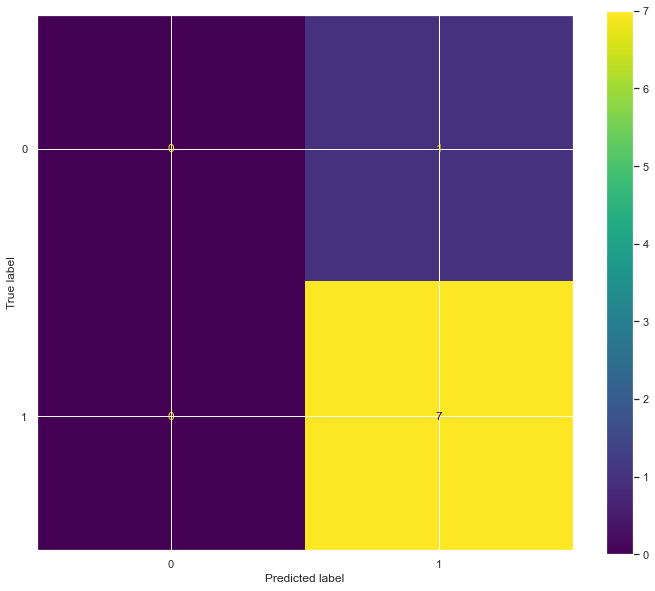

In [61]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model,X_test,y_test) 

In [62]:
from sklearn.metrics import classification_report
np.random.seed(1772023)
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
report = classification_report(y_test, y_preds)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         7

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

